Question 1

In [1]:
import yfinance as yf
import pandas as pd

In [2]:
tesla_data = yf.download("TSLA", start="2010-01-01", end="2023-12-31")
tesla_data.reset_index(inplace=True)
tesla_data.head()

[*********************100%***********************]  1 of 1 completed


Price,Date,Adj Close,Close,High,Low,Open,Volume
Ticker,,TSLA,TSLA,TSLA,TSLA,TSLA,TSLA
0,2010-06-29 00:00:00+00:00,1.592667,1.592667,1.666667,1.169333,1.266667,281494500
1,2010-06-30 00:00:00+00:00,1.588667,1.588667,2.028000,1.553333,1.719333,257806500
2,2010-07-01 00:00:00+00:00,1.464000,1.464000,1.728000,1.351333,1.666667,123282000
3,2010-07-02 00:00:00+00:00,1.280000,1.280000,1.540000,1.247333,1.533333,77097000
4,2010-07-06 00:00:00+00:00,1.074000,1.074000,1.333333,1.055333,1.333333,103003500


Question 2

In [ ]:
from selenium import webdriver
from selenium.webdriver.chrome.options import Options
from selenium.webdriver.chrome.service import Service
from bs4 import BeautifulSoup
from webdriver_manager.chrome import ChromeDriverManager
options = Options()
options.add_argument("--headless")
options.add_argument("user-agent=Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/87.0.4280.88 Safari/537.36")
service = Service(ChromeDriverManager().install())
driver = webdriver.Chrome(service=service, options=options)
url = "https://www.macrotrends.net/stocks/charts/TSLA/tesla/revenue"
driver.get(url)
soup = BeautifulSoup(driver.page_source, "html.parser")
driver.quit()
tables = soup.find_all("table")
if len(tables) == 0:
    print("No tables found!")
else:
    revenue_table = tables[0]
    rows = revenue_table.find_all('tr')
    for row in rows:
        cols = row.find_all('td')
        if len(cols) > 0:
            print(" | ".join([col.text.strip() for col in cols]))


Question 3

In [4]:
gme_data = yf.download("GME", start="2010-01-01", end="2023-12-31")
gme_data.reset_index(inplace=True)
gme_data.head()

[*********************100%***********************]  1 of 1 completed


Price,Date,Adj Close,Close,High,Low,Open,Volume
Ticker,,GME,GME,GME,GME,GME,GME
0,2010-01-04 00:00:00+00:00,3.854643,5.7250,5.7375,5.5000,5.5175,26702800
1,2010-01-05 00:00:00+00:00,3.959005,5.8800,5.9350,5.7250,5.7275,21269600
2,2010-01-06 00:00:00+00:00,4.044851,6.0075,6.0250,5.8050,5.8650,21471200
3,2010-01-07 00:00:00+00:00,3.443929,5.1150,5.2925,4.8550,5.0025,164761200
4,2010-01-08 00:00:00+00:00,3.415315,5.0725,5.3075,5.0575,5.1600,47872400


Question 4

In [5]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
url = "https://www.macrotrends.net/stocks/charts/GME/gamestop/revenue"
headers = {
    "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/87.0.4280.88 Safari/537.36"
}
html_data = requests.get(url, headers=headers).text
soup = BeautifulSoup(html_data, "html.parser")
tables = soup.find_all("table")
if len(tables) == 0:
    print("No tables found!")
else:
    revenue_table = tables[0]
    rows = revenue_table.find_all('tr')
    dates = []
    revenues = []
    for row in rows[1:]:
        cols = row.find_all('td')
        if len(cols) >= 2:
            date = cols[0].text.strip()
            revenue = cols[1].text.strip()
            dates.append(date)
            revenues.append(revenue)
    gme_revenue = pd.DataFrame({"Date": dates, "Revenue": revenues})
    print(gme_revenue.tail())

    Date Revenue
11  2013  $8,887
12  2012  $9,551
13  2011  $9,474
14  2010  $9,078
15  2009  $8,806


Question 5

In [6]:
import matplotlib.pyplot as plt
def make_graph(data, title):
    plt.figure(figsize=(10, 6))
    plt.plot(data['Date'], data['Close'], label='Close Price')
    plt.title(title)
    plt.xlabel('Date')
    plt.ylabel('Close Price')
    plt.legend()
    plt.show()

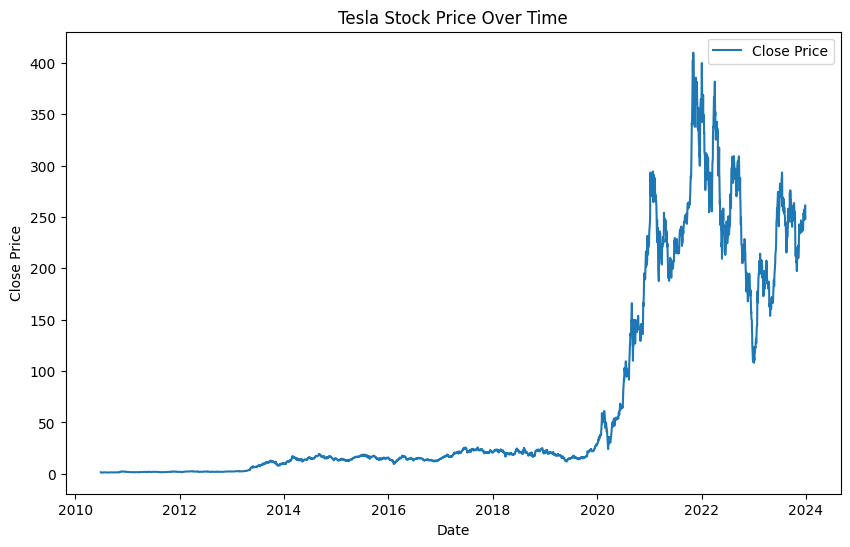

In [7]:
make_graph(tesla_data, "Tesla Stock Price Over Time")

Question 6

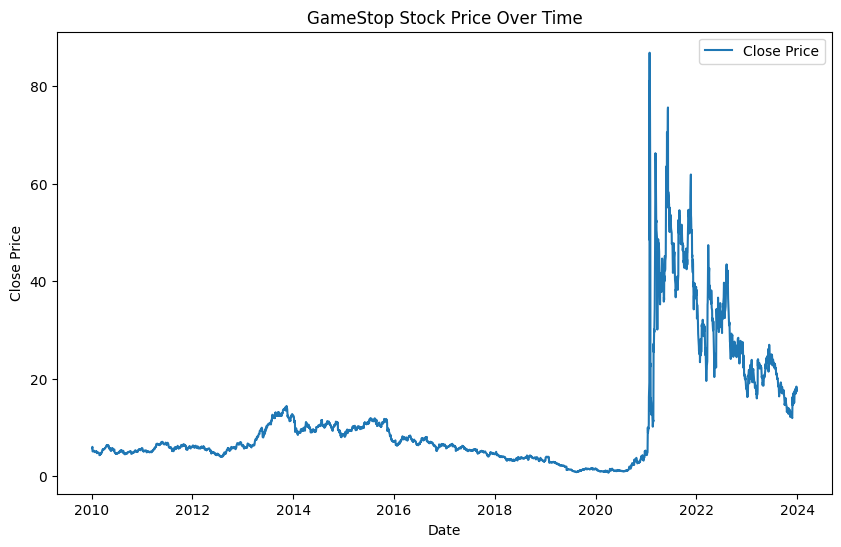

In [8]:
make_graph(gme_data, "GameStop Stock Price Over Time")